<a href="https://colab.research.google.com/github/HarshAade/02_TechnoHacks_Edutech_internship/blob/main/TechnoHacks_Edutech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('train.csv')

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


      1. Task : Perform Data Cleaning
                Clean a Dataset by removing missing values & outlers

Handling Missing Values:

In [26]:
# Age: You can replace missing age values with the median age of passengers
data['Age'].fillna(data['Age'].median(), inplace=True)

In [27]:
# Cabin: You might consider dropping this column since it has a significant number of missing values.
# If you want to keep it, you can fill missing values with a specific label like 'Unknown'.
data['Cabin'].fillna('Unknown', inplace=True)

In [28]:
# Embarked: You can fill the missing 'Embarked' values with the mode (most frequent value) of the 'Embarked' column.
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [30]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Handling Outliers

Imagine data as a line of numbers. Outliers are numbers that don't fit with the rest. To clean them:

1. **For Age**: We keep ages in the middle range (like 25-50 years) and remove very young or very old ages, like babies or super old folks.

2. **For Fare (Ticket Price)**: Similar to age, we keep ticket prices in the middle range (like $20-$50) and remove very cheap or very expensive tickets, like really cheap deals or super expensive ones.

We have a rule: If a number is more than 1.5 times away from the middle, it's an outlier and we throw it out. This makes our data better for understanding and analysis.


In [31]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define age boundaries
lower_age_bound = Q1 - 1.5 * IQR
upper_age_bound = Q3 + 1.5 * IQR

# Remove outliers in the 'Age' column
data = data[(data['Age'] >= lower_age_bound) & (data['Age'] <= upper_age_bound)]

# Similarly, for the 'Fare' column
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define fare boundaries
lower_fare_bound = Q1 - 1.5 * IQR
upper_fare_bound = Q3 + 1.5 * IQR

# Remove outliers in the 'Fare' column
data = data[(data['Fare'] >= lower_fare_bound) & (data['Fare'] <= upper_fare_bound)]


In [43]:
data.to_csv('clean.csv', index=False)


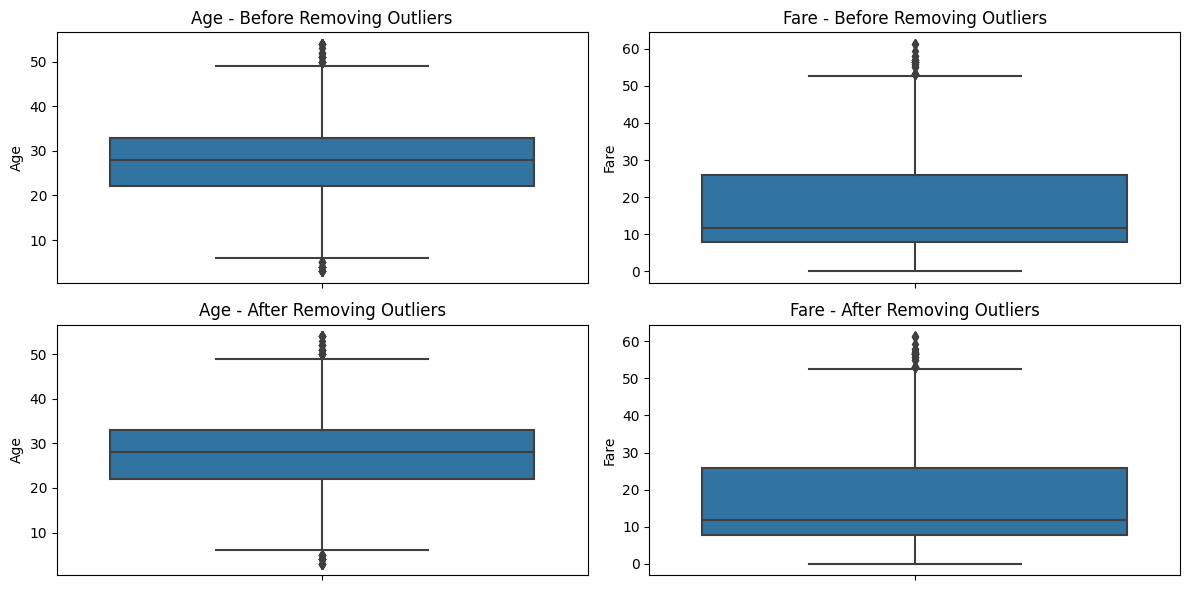

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for 'Age' and 'Fare' before and after removing outliers
plt.figure(figsize=(12, 6))

# Before removing outliers
plt.subplot(2, 2, 1)
sns.boxplot(data=data, y='Age')
plt.title('Age - Before Removing Outliers')

plt.subplot(2, 2, 2)
sns.boxplot(data=data, y='Fare')
plt.title('Fare - Before Removing Outliers')

# After removing outliers
data_cleaned = pd.read_csv('clean.csv')  # Read the cleaned dataset
plt.subplot(2, 2, 3)
sns.boxplot(data=data_cleaned, y='Age')
plt.title('Age - After Removing Outliers')

plt.subplot(2, 2, 4)
sns.boxplot(data=data_cleaned, y='Fare')
plt.title('Fare - After Removing Outliers')

plt.tight_layout()
plt.show()


In [46]:
# Read the cleaned dataset from 'clean.csv'
data_clean = pd.read_csv('clean.csv')

# Summary statistics before removing outliers
print("Summary Statistics Before Removing Outliers:")
print(data[['Age', 'Fare']].describe())

# Summary statistics after removing outliers
print("\nSummary Statistics After Removing Outliers:")
print(data_clean[['Age', 'Fare']].describe())

Summary Statistics Before Removing Outliers:
              Age        Fare
count  718.000000  718.000000
mean    28.079387   17.193204
std     10.012369   13.244507
min      3.000000    0.000000
25%     22.000000    7.889575
50%     28.000000   11.750000
75%     32.875000   25.928150
max     54.000000   61.379200

Summary Statistics After Removing Outliers:
              Age        Fare
count  718.000000  718.000000
mean    28.079387   17.193204
std     10.012369   13.244507
min      3.000000    0.000000
25%     22.000000    7.889575
50%     28.000000   11.750000
75%     32.875000   25.928150
max     54.000000   61.379200


     2. Task : Calculate Summaray Statistics
               Calculate Summary Statistics (mean,median,mode,standard deviation) for a dataset

In [51]:
# Calculate mean, median, mode, and standard deviation for the 'Age' column
mean_age = data['Age'].mean()
median_age = data['Age'].median()
mode_age = data['Age'].mode().iloc[0]  # Use iloc[0] to get the first mode (for cases with multiple modes)
std_age = data['Age'].std()

# Display the summary statistics
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")
print(f"Standard Deviation Age: {std_age}")


Mean Age: 28.079387186629525
Median Age: 28.0
Mode Age: 28.0
Standard Deviation Age: 10.01236856643464


     3. Task : Visualization using Hitogram
               Create a histogram or bar chart to visualize the distribution of data in a dataset

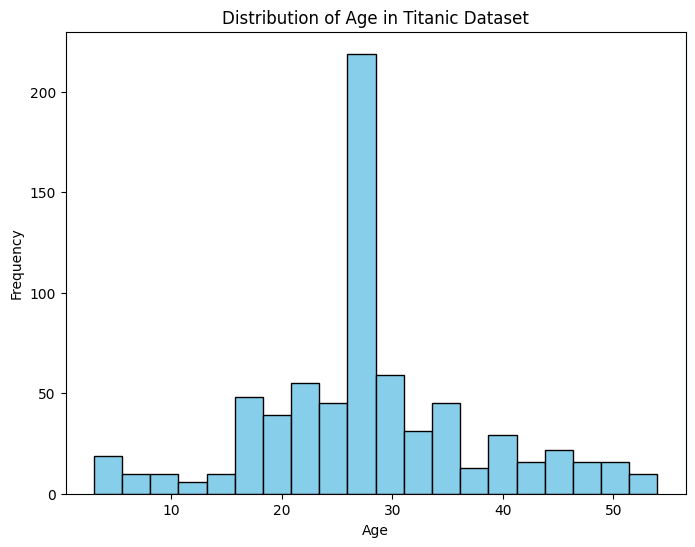

In [52]:


# Assuming you have a DataFrame called 'data'
# Let's create a histogram for the 'Age' column
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)

# Create the histogram
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age in Titanic Dataset')

# Show the histogram
plt.show()


     5. Task : Remove Duplication
          Identify and remove duplicate values in a dataset

In [53]:
data = data.drop_duplicates()

# Print the shape of the DataFrame to see how many duplicates were removed
print("Shape after removing duplicates:", data.shape)

Shape after removing duplicates: (718, 12)
